## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9920499	total: 58.5ms	remaining: 58.4s
1:	learn: 0.9722604	total: 59.4ms	remaining: 29.6s
2:	learn: 0.9516945	total: 60.4ms	remaining: 20.1s
3:	learn: 0.9351168	total: 61.4ms	remaining: 15.3s
4:	learn: 0.9197623	total: 62.4ms	remaining: 12.4s
5:	learn: 0.9020880	total: 63.4ms	remaining: 10.5s
6:	learn: 0.8857014	total: 64.3ms	remaining: 9.12s
7:	learn: 0.8693335	total: 65.1ms	remaining: 8.07s
8:	learn: 0.8539877	total: 65.9ms	remaining: 7.26s
9:	learn: 0.8374073	total: 66.7ms	remaining: 6.61s
10:	learn: 0.8220297	total: 67.5ms	remaining: 6.07s
11:	learn: 0.8082803	total: 68.4ms	remaining: 5.63s
12:	learn: 0.7933271	total: 69.1ms	remaining: 5.25s
13:	learn: 0.7787337	total: 69.9ms	remaining: 4.92s
14:	learn: 0.7665374	total: 70.7ms	remaining: 4.64s
15:	learn: 0.7521253	total: 71.7ms	remaining: 4.41s
16:	learn: 0.7405634	total: 72.5ms	remaining: 4.19s
17:	learn: 0.7289758	total: 73.2ms	remaining: 4s
18:	learn: 0.7165234	total: 73.9ms	remaining: 3

56:	learn: 0.4329715	total: 105ms	remaining: 1.73s
57:	learn: 0.4288391	total: 106ms	remaining: 1.71s
58:	learn: 0.4255193	total: 106ms	remaining: 1.7s
59:	learn: 0.4216151	total: 107ms	remaining: 1.68s
60:	learn: 0.4174026	total: 108ms	remaining: 1.66s
61:	learn: 0.4130052	total: 109ms	remaining: 1.65s
62:	learn: 0.4083933	total: 110ms	remaining: 1.63s
63:	learn: 0.4045947	total: 111ms	remaining: 1.62s
64:	learn: 0.4008681	total: 111ms	remaining: 1.6s
65:	learn: 0.3965285	total: 112ms	remaining: 1.59s
66:	learn: 0.3928427	total: 113ms	remaining: 1.58s
67:	learn: 0.3901451	total: 114ms	remaining: 1.56s
68:	learn: 0.3873045	total: 115ms	remaining: 1.55s
69:	learn: 0.3840204	total: 116ms	remaining: 1.54s
70:	learn: 0.3802842	total: 116ms	remaining: 1.52s
71:	learn: 0.3770351	total: 117ms	remaining: 1.51s
72:	learn: 0.3734200	total: 118ms	remaining: 1.5s
73:	learn: 0.3700013	total: 119ms	remaining: 1.49s
74:	learn: 0.3671007	total: 120ms	remaining: 1.48s
75:	learn: 0.3641944	total: 121ms	

153:	learn: 0.2500480	total: 190ms	remaining: 1.04s
154:	learn: 0.2492271	total: 191ms	remaining: 1.04s
155:	learn: 0.2483025	total: 192ms	remaining: 1.04s
156:	learn: 0.2476259	total: 193ms	remaining: 1.03s
157:	learn: 0.2466655	total: 194ms	remaining: 1.03s
158:	learn: 0.2461124	total: 195ms	remaining: 1.03s
159:	learn: 0.2452522	total: 196ms	remaining: 1.03s
160:	learn: 0.2444240	total: 196ms	remaining: 1.02s
161:	learn: 0.2435437	total: 197ms	remaining: 1.02s
162:	learn: 0.2430437	total: 198ms	remaining: 1.01s
163:	learn: 0.2424370	total: 199ms	remaining: 1.01s
164:	learn: 0.2420434	total: 200ms	remaining: 1.01s
165:	learn: 0.2414809	total: 201ms	remaining: 1.01s
166:	learn: 0.2410266	total: 202ms	remaining: 1s
167:	learn: 0.2403032	total: 202ms	remaining: 1s
168:	learn: 0.2397405	total: 203ms	remaining: 999ms
169:	learn: 0.2387813	total: 204ms	remaining: 997ms
170:	learn: 0.2379911	total: 205ms	remaining: 994ms
171:	learn: 0.2373997	total: 206ms	remaining: 991ms
172:	learn: 0.2368

277:	learn: 0.1843753	total: 295ms	remaining: 765ms
278:	learn: 0.1841276	total: 296ms	remaining: 764ms
279:	learn: 0.1836896	total: 296ms	remaining: 762ms
280:	learn: 0.1831827	total: 298ms	remaining: 762ms
281:	learn: 0.1824442	total: 299ms	remaining: 761ms
282:	learn: 0.1820525	total: 300ms	remaining: 761ms
283:	learn: 0.1816789	total: 301ms	remaining: 759ms
284:	learn: 0.1814677	total: 302ms	remaining: 757ms
285:	learn: 0.1808384	total: 303ms	remaining: 755ms
286:	learn: 0.1805591	total: 303ms	remaining: 754ms
287:	learn: 0.1802812	total: 304ms	remaining: 752ms
288:	learn: 0.1798467	total: 305ms	remaining: 750ms
289:	learn: 0.1793158	total: 306ms	remaining: 748ms
290:	learn: 0.1787079	total: 306ms	remaining: 747ms
291:	learn: 0.1784125	total: 307ms	remaining: 745ms
292:	learn: 0.1780542	total: 308ms	remaining: 743ms
293:	learn: 0.1776175	total: 309ms	remaining: 742ms
294:	learn: 0.1771564	total: 310ms	remaining: 740ms
295:	learn: 0.1769775	total: 311ms	remaining: 739ms
296:	learn: 

380:	learn: 0.1494951	total: 381ms	remaining: 618ms
381:	learn: 0.1494481	total: 382ms	remaining: 617ms
382:	learn: 0.1490150	total: 382ms	remaining: 616ms
383:	learn: 0.1488115	total: 383ms	remaining: 615ms
384:	learn: 0.1485434	total: 384ms	remaining: 613ms
385:	learn: 0.1482817	total: 385ms	remaining: 612ms
386:	learn: 0.1478007	total: 386ms	remaining: 611ms
387:	learn: 0.1476553	total: 387ms	remaining: 610ms
388:	learn: 0.1474563	total: 387ms	remaining: 609ms
389:	learn: 0.1472820	total: 388ms	remaining: 607ms
390:	learn: 0.1470304	total: 389ms	remaining: 606ms
391:	learn: 0.1469684	total: 390ms	remaining: 605ms
392:	learn: 0.1467536	total: 391ms	remaining: 604ms
393:	learn: 0.1464755	total: 392ms	remaining: 603ms
394:	learn: 0.1460910	total: 393ms	remaining: 601ms
395:	learn: 0.1457416	total: 393ms	remaining: 600ms
396:	learn: 0.1454254	total: 394ms	remaining: 599ms
397:	learn: 0.1450720	total: 395ms	remaining: 598ms
398:	learn: 0.1446364	total: 396ms	remaining: 596ms
399:	learn: 

500:	learn: 0.1199168	total: 486ms	remaining: 484ms
501:	learn: 0.1196808	total: 486ms	remaining: 483ms
502:	learn: 0.1194213	total: 488ms	remaining: 482ms
503:	learn: 0.1190785	total: 489ms	remaining: 481ms
504:	learn: 0.1187594	total: 489ms	remaining: 480ms
505:	learn: 0.1184472	total: 490ms	remaining: 479ms
506:	learn: 0.1182243	total: 491ms	remaining: 478ms
507:	learn: 0.1181024	total: 492ms	remaining: 476ms
508:	learn: 0.1178141	total: 493ms	remaining: 476ms
509:	learn: 0.1175777	total: 494ms	remaining: 475ms
510:	learn: 0.1175194	total: 495ms	remaining: 474ms
511:	learn: 0.1174055	total: 496ms	remaining: 473ms
512:	learn: 0.1171188	total: 497ms	remaining: 472ms
513:	learn: 0.1169019	total: 498ms	remaining: 471ms
514:	learn: 0.1168445	total: 498ms	remaining: 469ms
515:	learn: 0.1167267	total: 499ms	remaining: 468ms
516:	learn: 0.1165745	total: 500ms	remaining: 467ms
517:	learn: 0.1163107	total: 501ms	remaining: 466ms
518:	learn: 0.1160192	total: 502ms	remaining: 465ms
519:	learn: 

600:	learn: 0.1004880	total: 571ms	remaining: 379ms
601:	learn: 0.1001930	total: 572ms	remaining: 378ms
602:	learn: 0.1000030	total: 573ms	remaining: 377ms
603:	learn: 0.0998869	total: 574ms	remaining: 376ms
604:	learn: 0.0996156	total: 575ms	remaining: 375ms
605:	learn: 0.0993942	total: 576ms	remaining: 374ms
606:	learn: 0.0992325	total: 576ms	remaining: 373ms
607:	learn: 0.0990770	total: 577ms	remaining: 372ms
608:	learn: 0.0988889	total: 578ms	remaining: 371ms
609:	learn: 0.0987229	total: 579ms	remaining: 370ms
610:	learn: 0.0985496	total: 579ms	remaining: 369ms
611:	learn: 0.0983831	total: 580ms	remaining: 368ms
612:	learn: 0.0982035	total: 581ms	remaining: 367ms
613:	learn: 0.0980443	total: 582ms	remaining: 366ms
614:	learn: 0.0978456	total: 583ms	remaining: 365ms
615:	learn: 0.0977991	total: 584ms	remaining: 364ms
616:	learn: 0.0976003	total: 584ms	remaining: 363ms
617:	learn: 0.0975599	total: 585ms	remaining: 362ms
618:	learn: 0.0974126	total: 586ms	remaining: 361ms
619:	learn: 

716:	learn: 0.0834624	total: 676ms	remaining: 267ms
717:	learn: 0.0833657	total: 677ms	remaining: 266ms
718:	learn: 0.0832369	total: 678ms	remaining: 265ms
719:	learn: 0.0831905	total: 679ms	remaining: 264ms
720:	learn: 0.0830382	total: 680ms	remaining: 263ms
721:	learn: 0.0828258	total: 681ms	remaining: 262ms
722:	learn: 0.0827474	total: 682ms	remaining: 261ms
723:	learn: 0.0825469	total: 683ms	remaining: 260ms
724:	learn: 0.0824069	total: 684ms	remaining: 259ms
725:	learn: 0.0822189	total: 685ms	remaining: 258ms
726:	learn: 0.0821394	total: 686ms	remaining: 258ms
727:	learn: 0.0820350	total: 687ms	remaining: 257ms
728:	learn: 0.0819297	total: 688ms	remaining: 256ms
729:	learn: 0.0818549	total: 689ms	remaining: 255ms
730:	learn: 0.0817537	total: 690ms	remaining: 254ms
731:	learn: 0.0816433	total: 691ms	remaining: 253ms
732:	learn: 0.0815741	total: 692ms	remaining: 252ms
733:	learn: 0.0814139	total: 693ms	remaining: 251ms
734:	learn: 0.0812724	total: 694ms	remaining: 250ms
735:	learn: 

812:	learn: 0.0722734	total: 762ms	remaining: 175ms
813:	learn: 0.0721380	total: 763ms	remaining: 174ms
814:	learn: 0.0720607	total: 763ms	remaining: 173ms
815:	learn: 0.0718895	total: 764ms	remaining: 172ms
816:	learn: 0.0717709	total: 765ms	remaining: 171ms
817:	learn: 0.0717185	total: 766ms	remaining: 170ms
818:	learn: 0.0716026	total: 767ms	remaining: 169ms
819:	learn: 0.0714533	total: 767ms	remaining: 168ms
820:	learn: 0.0712973	total: 768ms	remaining: 167ms
821:	learn: 0.0711736	total: 769ms	remaining: 167ms
822:	learn: 0.0710459	total: 770ms	remaining: 166ms
823:	learn: 0.0709079	total: 771ms	remaining: 165ms
824:	learn: 0.0707944	total: 772ms	remaining: 164ms
825:	learn: 0.0707175	total: 772ms	remaining: 163ms
826:	learn: 0.0705753	total: 773ms	remaining: 162ms
827:	learn: 0.0705116	total: 774ms	remaining: 161ms
828:	learn: 0.0703955	total: 775ms	remaining: 160ms
829:	learn: 0.0703176	total: 776ms	remaining: 159ms
830:	learn: 0.0702173	total: 776ms	remaining: 158ms
831:	learn: 

935:	learn: 0.0609485	total: 866ms	remaining: 59.2ms
936:	learn: 0.0608388	total: 867ms	remaining: 58.3ms
937:	learn: 0.0607429	total: 868ms	remaining: 57.4ms
938:	learn: 0.0606913	total: 869ms	remaining: 56.4ms
939:	learn: 0.0605818	total: 870ms	remaining: 55.5ms
940:	learn: 0.0604894	total: 870ms	remaining: 54.6ms
941:	learn: 0.0603342	total: 872ms	remaining: 53.7ms
942:	learn: 0.0602227	total: 873ms	remaining: 52.8ms
943:	learn: 0.0601460	total: 874ms	remaining: 51.8ms
944:	learn: 0.0600191	total: 874ms	remaining: 50.9ms
945:	learn: 0.0599818	total: 875ms	remaining: 49.9ms
946:	learn: 0.0598477	total: 876ms	remaining: 49ms
947:	learn: 0.0597750	total: 877ms	remaining: 48.1ms
948:	learn: 0.0596965	total: 877ms	remaining: 47.2ms
949:	learn: 0.0595799	total: 879ms	remaining: 46.2ms
950:	learn: 0.0594859	total: 880ms	remaining: 45.3ms
951:	learn: 0.0594052	total: 881ms	remaining: 44.4ms
952:	learn: 0.0593312	total: 882ms	remaining: 43.5ms
953:	learn: 0.0592669	total: 884ms	remaining: 42

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

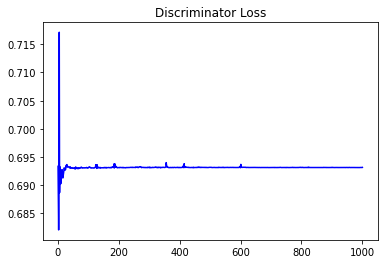

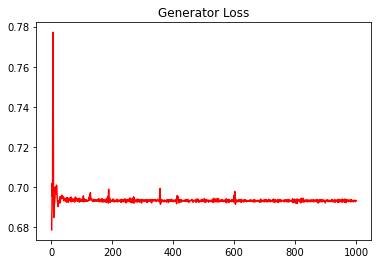

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11687708946442574


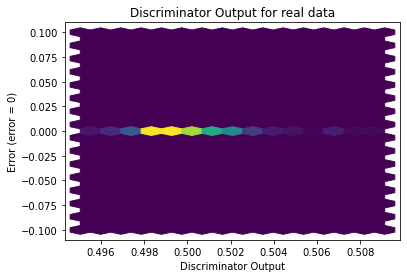

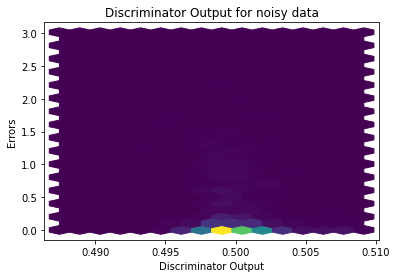

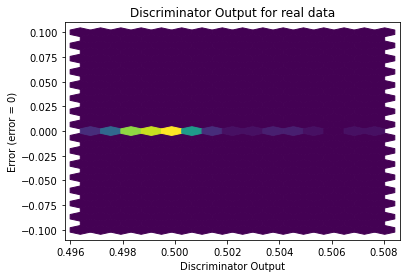

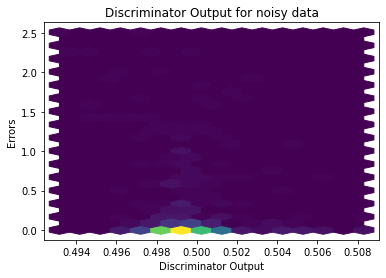

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


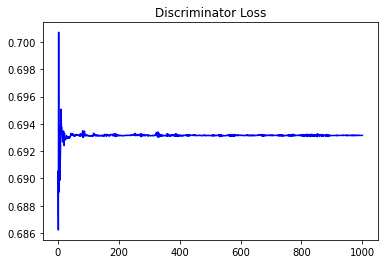

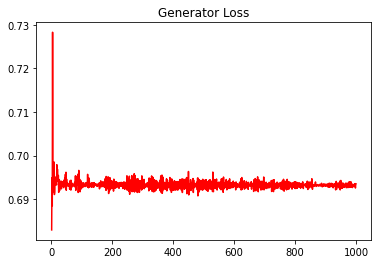

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11820950849695898


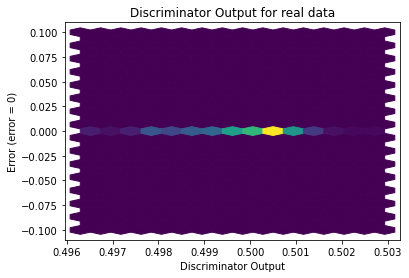

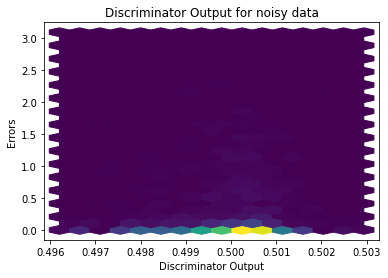

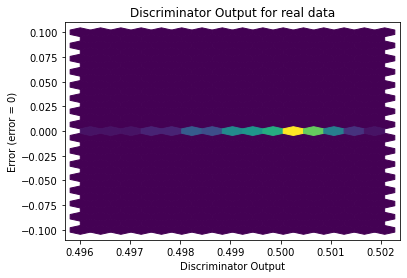

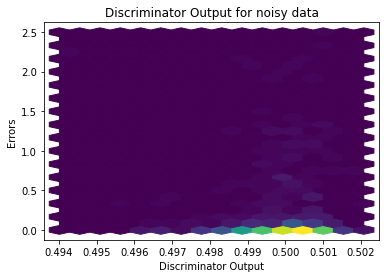

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0920]], requires_grad=True)
